# 網頁資料擷取實務
- sqlite教學
- 爬蟲資料與資料庫存取、互動選單設計
- 中文斷字

## sqlite 相關應用

In [1]:
#編輯sqlite檔案  輸入
#安裝好firefox
#新增.sqlite

import sqlite3
conn = sqlite3.connect('scores.sqlite')#連接
conn.execute('insert into student values(6,"Sean");')#執行sql語法
conn.commit()#執行動作
conn.close()#關閉


In [2]:
#編輯sqlite檔案  輸出
import sqlite3
conn = sqlite3.connect('scores.sqlite')#連接
cursor = conn.execute('SELECT * FROM student;')#執行sql語法

#cursor是甚麼? 怎麼看?
#cursor.fetchall()

for row in cursor:
    print('No {}:{}'.format(row[0],row[1]))
conn.close()


No 2:Sean
No 3:暉鈞
No 4:Emily
No 6:Sean


In [4]:
### 資料庫應用程式，輸入輸出刪除修改

import sqlite3

conn = sqlite3.connect('scores.sqlite')

def disp_menu():
    print("學生資料編輯")
    print("------------")
    print("1.新增")
    print("2.編輯")
    print("3.刪除")
    print("4.顯示所有學生")
    print("0.結束")
    print("------------")

#新增insert
def append_data():
    while True:
        no = int(input("請輸入學生座號(-1停止輸入):"))
        if no == -1: break
        name = input("請輸入學生姓名:")
        sqlstr = "select * from student where stdno={};".format(no)
        cursor = conn.execute(sqlstr)
        if len(cursor.fetchall()) > 0:
            print("您輸入的座號已經有資料了")
        else:
            sqlstr = "insert into student values({},'{}');".format(no,name)
            conn.execute(sqlstr)
            conn.commit()

#編輯update
def edit_data():
    no = input("請輸入要編輯的學生座號:")
    sqlstr = "select * from student where stdno={};".format(no)
    cursor = conn.execute(sqlstr)
    rows = cursor.fetchall()
    if len(rows) > 0:
        print("目前的學生姓名:",rows[0][1])
        name = input("請輸入學生姓名：")
        sqlstr = "update student set name='{}' where stdno={};".format(name, no)
        conn.execute(sqlstr)
        conn.commit()
    else:
        print("找不到要編輯的學生座號")

#刪除delete
def del_data():
    no = input("請輸入要刪除的學生座號:")
    sqlstr = "select * from student where stdno={};".format(no)
    cursor = conn.execute(sqlstr)
    rows = cursor.fetchall()
    if len(rows) > 0:
        print("你目前要刪除的是座號{}的{}".format(rows[0][0], rows[0][1]))
        answer = input("確定要刪除嗎？(y/n)")
        if answer == 'y' or answer == 'Y':
            sqlstr = "delete from student where stdno={};".format(no)
            conn.execute(sqlstr)
            conn.commit()
            print("已刪除指定的學生...")
    else:
        print("找不到要刪除的學生")

#呈現
def disp_data():
    cursor = conn.execute('select * from student;')
    for row in cursor:
        print("No {}: {}".format(row[0],row[1]))



while True:
    disp_menu()
    choice = int(input("請輸入您的選擇:"))
    if choice == 0 : break
        
    if choice == 1: 
        append_data()
    elif choice == 2:
        edit_data()
    elif choice == 3:
        del_data()
    elif choice == 4:
        disp_data()
    else: break
    x = input("請按Enter鍵回主選單")


學生資料編輯
------------
1.新增
2.編輯
3.刪除
4.顯示所有學生
0.結束
------------
請輸入您的選擇:1
請輸入學生座號(-1停止輸入):-1
請按Enter鍵回主選單
學生資料編輯
------------
1.新增
2.編輯
3.刪除
4.顯示所有學生
0.結束
------------
請輸入您的選擇:0


##  網頁資料爬好存到資料庫

中油歷年油價查詢系統
------------
1.從網站載入最新油價
2.顯示歷年油價資訊
3.最近10週油價資訊
4.油價走勢圖
0.結束
------------
請輸入您的選擇:4


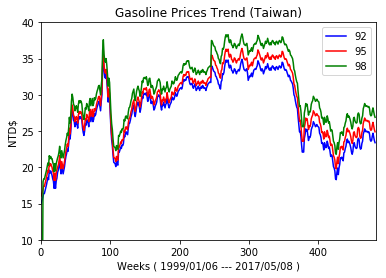

請按Enter鍵回主選單
中油歷年油價查詢系統
------------
1.從網站載入最新油價
2.顯示歷年油價資訊
3.最近10週油價資訊
4.油價走勢圖
0.結束
------------
請輸入您的選擇:0


In [5]:
# 把網頁資料爬好存到資料庫
# 程式 10-1.py (Python 3 version)

import sqlite3
from bs4 import BeautifulSoup
import requests
import numpy as np
import matplotlib.pyplot as pt

conn = sqlite3.connect('gasoline.sqlite')

#選單
def disp_menu():
    print("中油歷年油價查詢系統")
    print("------------")
    print("1.從網站載入最新油價")
    print("2.顯示歷年油價資訊")
    print("3.最近10週油價資訊")
    print("4.油價走勢圖")
    print("0.結束")
    print("------------")


#新增(爬)資料
def fetch_data():
    url = 'http://new.cpc.com.tw/division/mb/oil-more4.aspx'

    html = requests.get(url).text
    sp = BeautifulSoup(html, 'html.parser')
    data = sp.find_all('span', {'id':'Showtd'})
    rows = data[0].find_all('tr')

    prices = list()
    for row in rows:
        cols = row.find_all('td')
        if len(cols[1].text) > 0:
            item = [cols[0].text, cols[1].text, \
                    cols[2].text, cols[3].text]
            prices.append(item)
    for p in prices:
        sqlstr = "select * from prices where gdate='{}';".format(p[0])
        cursor = conn.execute(sqlstr)
        if len(cursor.fetchall()) == 0:
            g92 = 0 if p[1]=='' else float(p[1])
            g95 = 0 if p[2]=='' else float(p[2])
            g98 = 0 if p[3]=='' else float(p[3])
            sqlstr = "insert into prices values('{}', {}, {}, {});". \
                format(p[0], g92, g95, g98)
            print(sqlstr)
            conn.execute(sqlstr)
            conn.commit()

#展示
def disp_10data():
    cursor = conn.execute('select * from prices order by gdate desc;')
    n = 0
    for row in cursor:
        print("日期：{}，92無鉛：{}，95無鉛：{}，98無鉛：{}". \
            format(row[0],row[1],row[2],row[3]))
        n = n + 1
        if n == 10:
            break

            
#畫圖表
def chart():
    data = []
    cursor = conn.execute('select * from prices order by gdate;')
    for row in cursor:
        data.append(list(row))
    x = np.arange(0,len(data))
    dataset = [list(), list(), list()]
    for i in range(0, len(data)):
        for j in range(0,3):
            dataset[j].append(data[i][j+1])
    w = np.array(dataset[0])
    y = np.array(dataset[1])
    z = np.array(dataset[2])
    pt.ylabel("NTD$")
    pt.xlabel("Weeks ( {} --- {} )".format(data[0][0], data[len(data)-1][0]))
    pt.plot(x, w, color="blue", label="92")
    pt.plot(x, y, color="red", label="95")
    pt.plot(x, z, color="green", label="98")
    pt.xlim(0,len(data))
    pt.ylim(10,40)
    pt.title("Gasoline Prices Trend (Taiwan)")
    pt.legend()
    pt.show()

    
#SHOW資料與選項
def disp_alldata():
    cursor = conn.execute('select * from prices order by gdate desc;')
    n = 0
    for row in cursor:
        print("日期：{}，92無鉛：{}，95無鉛：{}，98無鉛：{}". \
            format(row[0],row[1],row[2],row[3]))
        n = n + 1
        if n == 20:
            x = input("請按Enter鍵繼續...(Q:回主選單)")
            if x == 'Q' or x == 'q': break
            n = 0



while True:
    disp_menu()
    choice = int(input("請輸入您的選擇:"))
    if choice == 0 : break
    if choice == 1: 
        fetch_data()
    elif choice == 2:
        disp_alldata()
    elif choice == 3:
        disp_10data()
    elif choice == 4:
        chart()
    else: break
    x = input("請按Enter鍵回主選單")


## 中文斷詞

In [6]:
# _*_ coding: utf-8 _*_
# 蒐集新聞&中文

import requests
from bs4 import BeautifulSoup

url = 'http://www.appledaily.com.tw/appledaily/hotdaily/headline'

news_page = requests.get(url)
news = BeautifulSoup(news_page.text, 'html.parser')

news_title = news.find_all('div', {'class': 'aht_title'})

news_title[0].find_all('a')[0].text

headlines = ''
for t in news_title:
    title = t.find_all('a')[0]
    headlines += title.text

print(headlines)



迷姦女房客 手法卑劣《蘋果》實測 身家職涯全都露性侵犯鋸鐐脫逃 晃24小時才逮回惡老闆買磨平胎 害死員工和解 豬哥亮病榻致電余天狼師傳聞再添一樁  高中女Dcard控訴遭性侵留宿借錢卻遭背叛 志工心痛小開駕法拉利撞車 慘 修理要百萬BMW飆國道自撞 2人拋飛亡勞保高薪低報 2萬企業被盯胡椒鹽摻工業鎂 竟判無罪醋男手機定位揪劈腿女遺贈稅新制今上路 可用保單節稅油價預估表沈玉琳帶頭公然談房事 爆老婆料芽芽森77了！陳抗多 蔡脫口：我聽到後就不用大聲了逆轉 擊斃拒捕男 警遭起訴預祝520 睽違17年 台股站上萬點「愛戀妄想」纏女 男須住院監護2年散戶不跟進 這次萬點好冷蘋論：先姓資 再姓社今天我最美辣蘋果：總統選舉餘恨（余艾苔）下月12日起 每包菸漲20元注長照電子腳鐐功能不彰 11嫌脫逃國軍准男官兵肥胖 要女性纖瘦趙少康傳真：WHA的苦肉計（趙少康）電子腳鐐銬不住  性侵犯搭船脫逃「為保護民眾 還是會開槍」全球最強美顏錄影手機SUGAR S9！鑲寶石6千萬高畫質 送媽最感心


In [37]:
#jieba功能說明
#pip install jieba 安裝 自訂字典

import jieba
jieba.load_userdict("userdict.txt")#載入自定義的字典
words = jieba.cut("他來到台北市臺北醫學大學上鈞哥的Python程式設計課程，老師非常感動，有滿滿的大平台")


for i in words:
    print(i)
    
#有時候無法用自定義字典，就可以調整預設字典
#範例：jieba.suggest_freq(('中', '将'), True)

他來
到
台北市
臺北醫學大學
上
鈞哥
的
Python
程式設計
課程
，
老師
非常
感動
，
有
滿滿
的
大平台


其他jieba功能請參考
https://github.com/fxsjy/jieba
安裝：pip install jieba

In [36]:
# _*_ coding: utf-8 _*_
# 中文段詞&排序

import requests, jieba, operator
from bs4 import BeautifulSoup

url = 'http://www.appledaily.com.tw/appledaily/hotdaily/headline'

news_page = requests.get(url)
news = BeautifulSoup(news_page.text, 'html.parser')

news_title = news.find_all('div', {'class': 'aht_title'})

headlines = ''
for t in news_title:
    title = t.find_all('a')[0]
    headlines += title.text

words = jieba.cut(headlines)

#看看斷的怎麼樣
#For i in words:
#print (i)

#算頻率，篩選次數

word_count = dict()

for word in words:
    if word in word_count.keys():
        word_count[word] += 1
    else:
        word_count[word] = 1

    sorted_wc = sorted(word_count.items(), key=operator.itemgetter(1), reverse=True)

for item in sorted_wc:
    if item[1]>1:
        print(item)
    else:
        break

(' ', 30)
('：', 4)
('2', 3)
('男', 3)
('！', 3)
('蘋果', 2)
('逃', 2)
('再', 2)
('女', 2)
('了', 2)
('我', 2)
('「', 2)
('」', 2)
('年', 2)
('萬點', 2)
('（', 2)
('）', 2)
('趙少康', 2)
('怕', 2)


# 作業
- 尋找一篇網路的文章斷字
- 利用jieba斷字與自定義字典功能
- 按照字詞出現平率由大到小排列
- 需移除標點符號

''':!),.:;?]}¢'"、。〉》」』】〕】〞︰︱︳﹐､﹒ ﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠ 々∥•‧ˇˉ─--′』」([{£¥'"‵〈《「『【〔【（［｛￡￥〝︵︷︹︻ ︽︿﹁﹃﹙﹛﹝（｛「『-—_…'''



In [56]:
# 單篇新聞範例參考(未完成)

import requests, jieba, operator
from bs4 import BeautifulSoup

#尋找一篇網路的文章
url = 'https://tw.travel.yahoo.com/'

news_page = requests.get(url)
news = BeautifulSoup(news_page.text, 'html.parser')
contentAll = news.find_all("div",{"item_topic"})
#html的目的地設定完成

contentWord =""
for t in contentAll:
    contentWord+=t.text

# 自創字典檔
jieba.load_userdict("userdict2.txt")
jieba.suggest_freq('高雄國際旅展', True)
jieba.suggest_freq('將', True)
jieba.suggest_freq('登場', True)

#利用jieba斷字與自定義字典功能
Words=jieba.cut(contentWord)

word_count = {}
for word in Words:
    if word in word_count.keys():
        word_count[word] += 1
    else:
        word_count[word] = 1
sorted_wc = sorted(word_count.items(), key=operator.itemgetter(1), reverse=True)
#operator.itemgetter會得到tuple
#dict.get會得到list

no_means = '''Ｘ~│:!),.:;?]}¢'"、。〉》」』】〕】〞︰︱︳﹐､﹒ ﹔﹕﹖﹗﹚﹜﹞！），．：；？｜｝︴︶︸︺︼︾﹀﹂﹄﹏､～￠ 々∥•‧ˇˉ─--′』」([{£¥'"‵〈《「『【〔【（［｛￡￥〝︵︷︹︻ ︽︿﹁﹃﹙﹛﹝（｛「『-—_…'''

for item in sorted_wc:
    if item[0] not in no_means:
        if item[1]>1:
            print(item)

('有', 5)
('觀光', 3)
('的', 3)
('美食', 3)
('美國', 2)
('簽證', 2)
('一日', 2)
('鐵道', 2)
('在', 2)
('高雄國際旅展', 2)
('將', 2)
('登場', 2)
('雲朗', 2)
('E', 2)
('線', 2)
('好康', 2)
('2017', 2)
('年', 2)
('日', 2)
('黃', 2)
('老店', 2)
('小吃', 2)
('吃', 2)


In [40]:
print(word_count)

{'【': 4, '美國': 2, '】': 4, '簽證超': 1, '容易': 1, '！': 9, '免': 1, '簽證': 2, 'ESTA': 1, '、': 1, '商務': 1, '觀光': 3, 'Q': 1, '&': 1, 'A': 1, '懶人': 1, '包到': 1, '靜岡當': 1, '一日': 2, '鐵道': 2, '迷': 1, '「': 3, '大井川': 1, '」': 3, '沿線': 1, '秘境': 1, '散策': 1, '750': 1, '円東': 1, '京都': 1, '23': 1, '區任': 1, '你': 1, '逛': 1, 'JR': 1, '券超': 1, '便利': 1, '實用': 1, '攻略': 1, '海岸': 1, 'Ｘ': 2, '大道': 1, '藝術': 1, ' ': 7, '台東': 1, '十大': 1, '必拍': 1, '推薦': 1, '南部': 1, '也': 1, '有': 5, '老梅': 1, '石槽': 1, '絕美': 1, '奇景': 1, '季節': 1, '限定': 1, '不可': 1, '錯過': 1, '的': 3, '岡山': 1, '新風貌': 1, 'mt': 1, '紙膠': 1, '帶': 1, 'X': 1, '岡': 1, '山城': 1, '『': 1, '札幌': 1, '』': 1, '翻譯': 1, '在': 2, '別': 1, '擔心': 1, '平價享': 1, '茶道': 1, '與': 1, '和服': 1, '體驗': 1, '高雄國際旅展': 2, '將': 2, '登場': 2, '雲朗': 2, 'E': 2, '線': 2, '好康': 2, '2017': 2, '年': 2, '公主': 1, '遊輪': 1, '今': 1, '(': 2, '12': 1, ')': 2, '日': 2, '基隆港': 1, '首發': 1, '啟航': 1, '金瓜石': 1, '‧': 2, '無耳茶': 1, '壺山': 1, '。': 3, '黃': 2, '金小鎮': 1, '夜景': 1, '│': 2, '報時山': 1, '登山': 1, '步道': 1, '海天': 1, '一線': 1, '